<a href="https://colab.research.google.com/github/swetha-crack-it/Datascience-/blob/main/Data_Science3(advertising).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


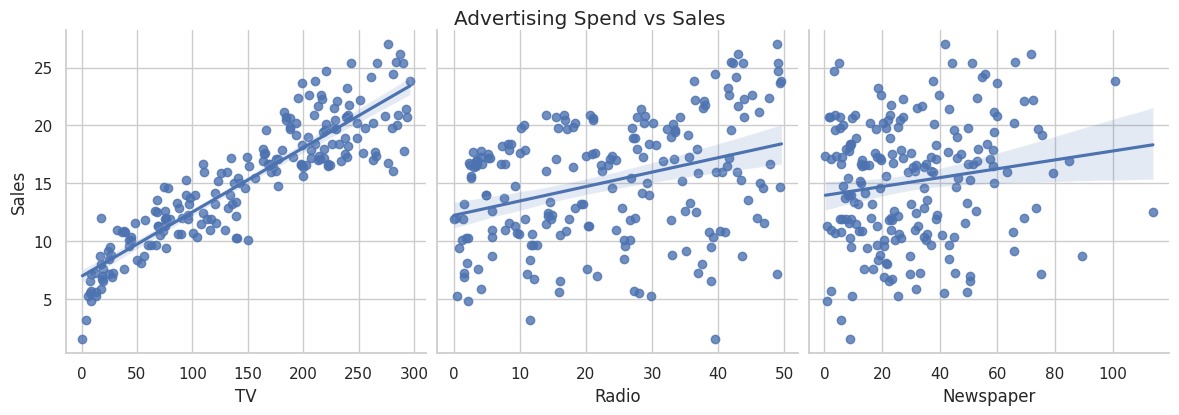

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a pairplot to visualize relationships between advertising spend and sales
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', height=4, aspect=1)

# Add a title
plt.suptitle("Advertising Spend vs Sales", y=1.02)

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = df['Sales']  # Dependent variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (160, 3)
Testing set shape: (40, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature Names:", X_train.columns.tolist())


Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]
Feature Names: ['TV', 'Radio', 'Newspaper']


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Optional: Show predictions side-by-side with actual values
results = pd.DataFrame({'Actual Sales': y_test.values, 'Predicted Sales': y_pred})
print(results.head())


Model Evaluation Metrics:
R² Score: 0.9059011844150826
Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
   Actual Sales  Predicted Sales
0          16.9        17.034772
1          22.4        20.409740
2          21.4        23.723989
3           7.3         9.272785
4          24.7        21.682719
